## Домашнее задание 2. Оганян Роберт, 381808-1

#### Постановка задачи

1. Определить тип данных для каждого из столбцов файла 02_Автоаварии.xls.
2. Изучить распределение случайных величин  – видимость дороги в момент
совершения аварии (Visibility) и 1, 2, 3, 4 – видимость дороги в момент
совершения аварии степени серьезности 1, 2, 3, 4 (Severity). Выбрать
инструмент Python для решения задачи (matplotlib.pyplot.hist(),
seaborn.distplot() или seaborn.kdeplot()), построить гистограммы и функции
распределения величин.
3. Построить вариационный ряд и статистический ряд для величины
 – температура воздуха в момент совершения аварии (Temperature),
построить группированный статистический ряд.
4. Определить 5 городов с наибольшим количеством автомобильных аварий за
наблюдаемый период. Построить функции распределения случайных
величин Di - протяженность участка дороги, задействованного при аварии
(Distance), в i-ом городе из данного списка, i = 1, 2, …, 5

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv(filepath_or_buffer = "../data/US_Accidents_Dec21_updated.csv",encoding="cp1251")

In [4]:
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
data.dtypes

ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity   

In [6]:
data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
data.columns.size

47

In [8]:
data.iloc[: , :10]

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.
...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.


In [9]:
data.iloc[: , 10:20]

,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code
0,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU
1,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO
2,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK
3,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR
4,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK
...,...,...,...,...,...,...,...,...,...,...
2845337,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL
2845338,NaN,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF
2845339,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA
2845340,NaN,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO


In [10]:
data.iloc[: , 20:30]

,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition
0,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain
1,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain
2,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast
3,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast
4,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain
...,...,...,...,...,...,...,...,...,...,...
2845337,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair
2845338,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair
2845339,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy
2845340,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair


In [11]:
data.iloc[: , 30:40]

,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2845337,False,False,False,False,False,False,False,False,False,False
2845338,False,False,False,False,False,False,False,False,False,False
2845339,False,False,False,False,True,False,False,False,False,False
2845340,False,False,False,False,False,False,False,False,False,False


In [12]:
data.iloc[: , 40:]

,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,False,False,False,Night,Night,Night,Night
1,False,False,False,Night,Night,Night,Night
2,False,False,False,Night,Night,Night,Day
3,False,False,False,Night,Night,Day,Day
4,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...
2845337,False,False,False,Day,Day,Day,Day
2845338,False,False,False,Day,Day,Day,Day
2845339,False,False,False,Day,Day,Day,Day
2845340,False,False,False,Day,Day,Day,Day


### 1. Определить тип данных для каждого из столбцов файла

**Количественные дискретные** - целые числа: *Zipcode*

**Количественные непрерывные** - вещественные числа и дата: * Start_Time,	End_Time, Start_Lat, Start_Lng, End_Lng, Distance(mi), Number, Temperature(F), Wind_Chill(F), Weather_Timestamp, Humidity(%), Pressure(in), Visibility(mi), Wind_Speed(mph), Precipitation(in)*



**Категориальные номинальные** - нечисловые данные, можно сказать классы: *ID, Description, Street, Side, City, County, State, Country, Timezone, Airport_Code,Wind_Direction, Weather_Condition, Sunrise_Sunset, Civil_Twilight, Nautical_Twilight, Astronomical_Twilight*



**Категориальные номинальные дихотомические (бинарные)** - категориальный признак, который может быть либо true, либо false: *Amenity, Bump, Crossing, Give_Way, Junction, No_Exit, Railway, Roundaboutm Station, Stop, Traffic_Calming, Traffic_Signal, Turning_Loop*

**Категориальные ординальные** - категориальные признаки, которые "упорядочиваются", но порядок выражается не числами: *Severity*

### 2.  Построить гистограммы и функции распределения величин: видимость дороги в момент совершения аварии, видимость дороги в момент совершения аварии степени серьезности 1, 2, 3, 4

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np
from scipy.stats import norm

In [14]:
data1 = data[data['Visibility(mi)'].notna()]

Видимость дороги

Text(0.5, 0, 'Count of values')

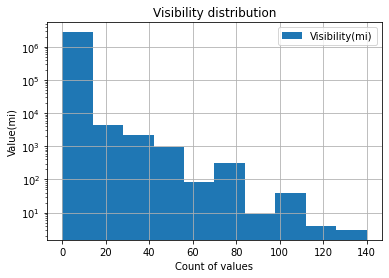

In [15]:
data1['Visibility(mi)'].hist(log=True, bins = 10, legend = True)
plt.title("Visibility distribution")
plt.ylabel("Value(mi)")
plt.xlabel("Count of values")

C:\Users\OgRob\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Visibility(mi)', ylabel='Density'>

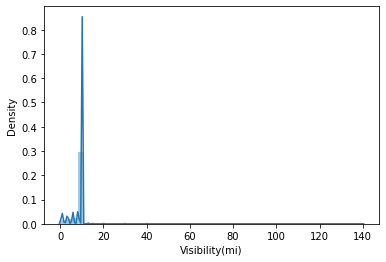

In [16]:
sns.distplot(data1['Visibility(mi)'])

C:\Users\OgRob\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Visibility(mi)'>

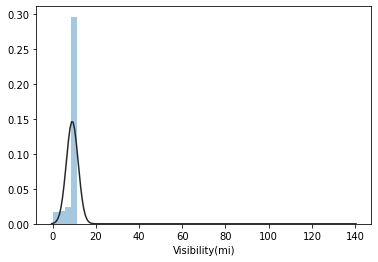

In [17]:
sns.distplot(data1['Visibility(mi)'], fit=norm, kde=False)

<AxesSubplot:xlabel='Visibility(mi)', ylabel='Density'>

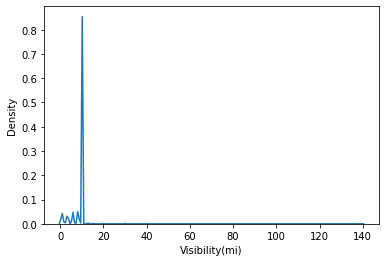

In [18]:
sns.kdeplot(data1['Visibility(mi)'])

Text(0.5, 1.0, 'Эмпирическая функция распределения Visibility')

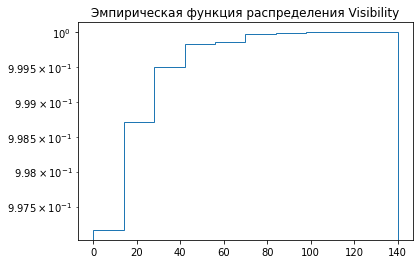

In [19]:
plt.hist(data1['Visibility(mi)'], density = True, cumulative = True, histtype = 'step', fill = False, log=True)
plt.title("Эмпирическая функция распределения Visibility")

Видимость дороги в момент совершения аварии степени серьезности 1, 2, 3, 4

In [20]:
ksi_indexes = [1, 2, 3, 4] # Степени серьезности 1,2,3,4

In [21]:
df1 = data1[data1.Severity == 1]
df2 = data1[data1.Severity == 2]
df3 = data1[data1.Severity == 3]
df4 = data1[data1.Severity == 4]

df_separeted = [df1['Visibility(mi)'], 
             df2['Visibility(mi)'], df3['Visibility(mi)'],
             df4['Visibility(mi)']]

In [22]:
ksi_labels = ['Степень серьезности 1', 'Степень серьезности 2', 'Степень серьезности 3', 'Степень серьезности 4']

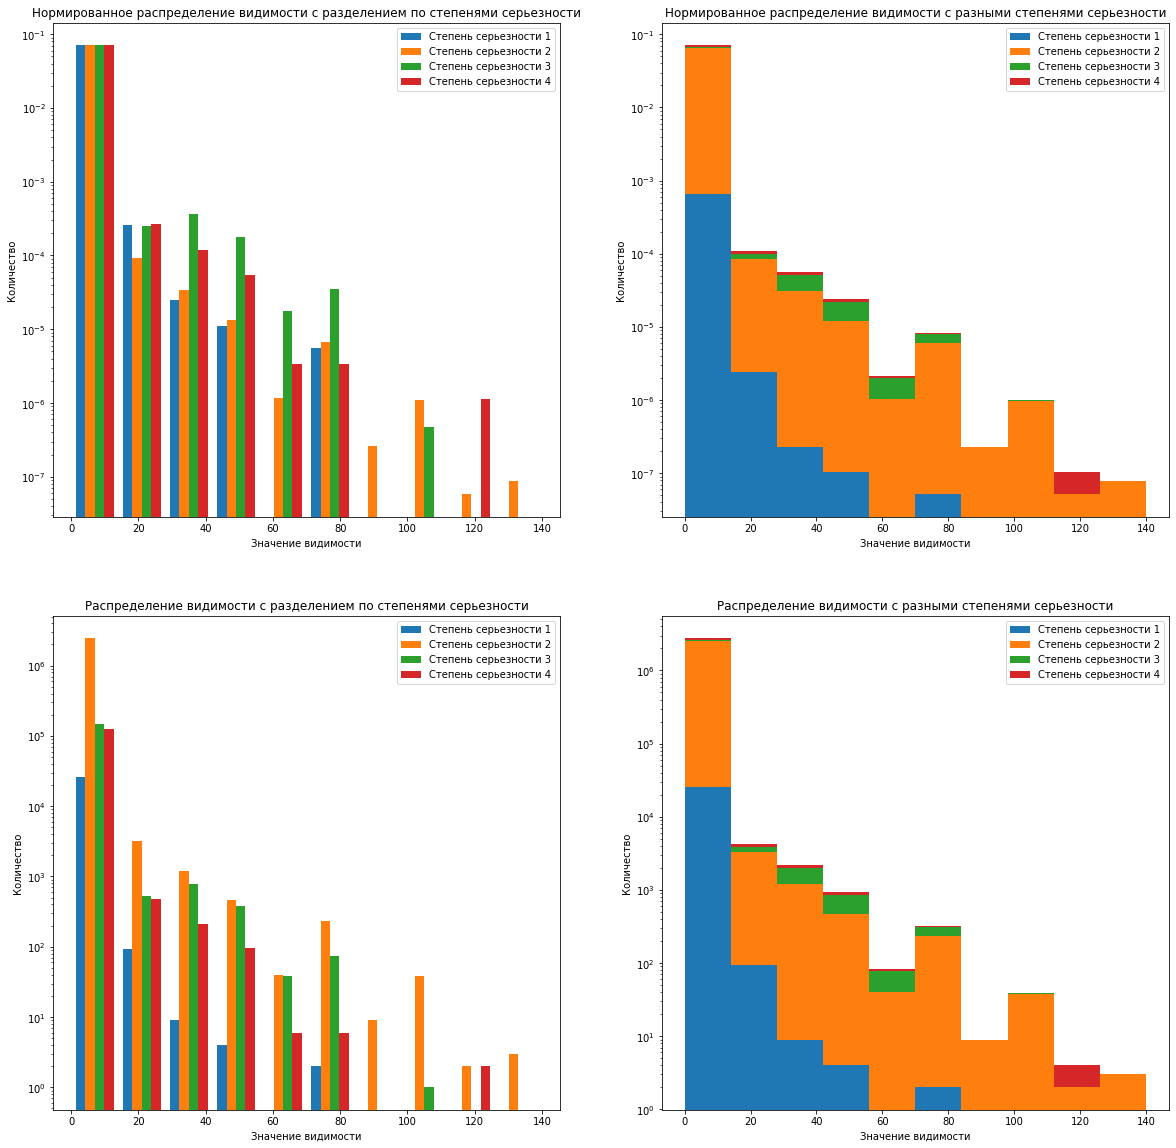

In [23]:
fig, axes = plt.subplots(ncols=2,nrows=2, figsize = (20, 20))


axes[0][0].hist(df_separeted, log = True, label = ksi_labels, histtype = 'bar', density = True)
axes[0][0].legend()
axes[0][0].set_title("Нормированное распределение видимости с разделением по степенями серьезности")

axes[1][0].hist(df_separeted, log = True, label = ksi_labels, histtype = 'bar')
axes[1][0].legend()
axes[1][0].set_title("Распределение видимости с разделением по степенями серьезности")

axes[0][1].hist(df_separeted, log = True, label = ksi_labels, histtype = 'bar', density = True, stacked = True)
axes[0][1].legend()
axes[0][1].set_title("Нормированное распределение видимости с разными степенями серьезности")

axes[1][1].hist(df_separeted, log = True, label = ksi_labels, histtype = 'bar', stacked = True)
axes[1][1].legend()
axes[1][1].set_title("Распределение видимости с разными степенями серьезности")

for i in range(2):
    for j in range(2):
        axes[i][j].set_xlabel("Значение видимости")
        axes[i][j].set_ylabel("Количество")

plt.show()

Из-за того, что в sns нет log scale, мне придется обрезать данные по абсциссе

C:\Users\OgRob\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\OgRob\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\OgRob\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

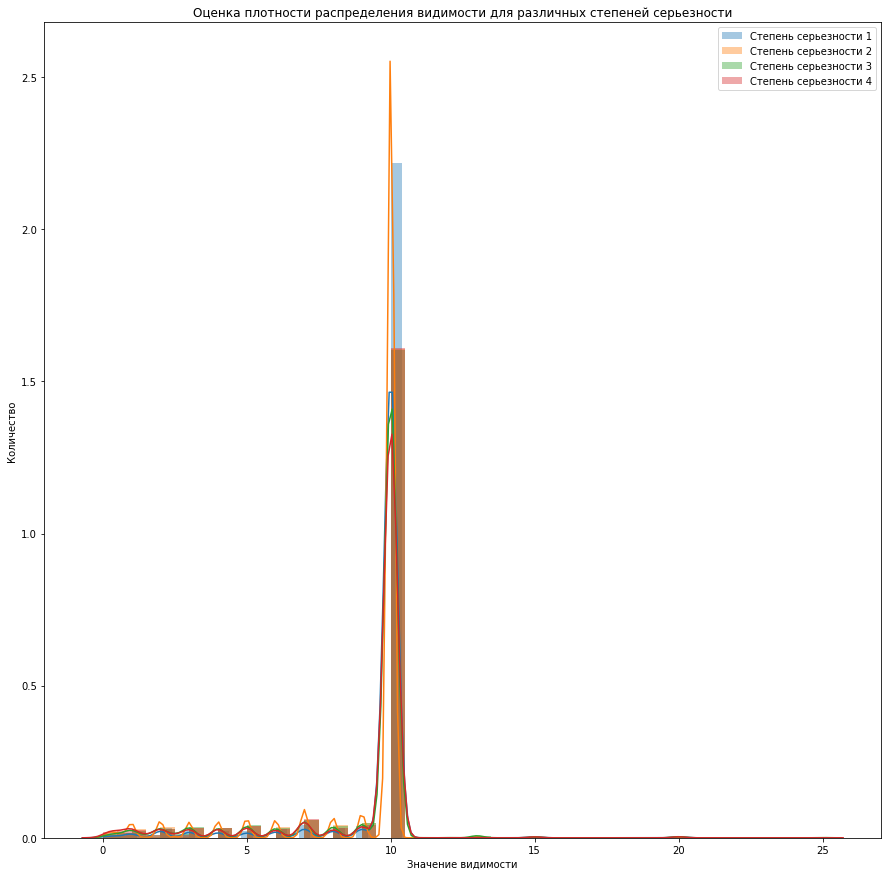

In [24]:
fig, axes = plt.subplots(1, figsize = (15, 15))

sns.distplot(df1["Visibility(mi)"][df1["Visibility(mi)"] <= 25], kde = True, label = "Степень серьезности 1")
sns.distplot(df2["Visibility(mi)"][df2["Visibility(mi)"] <= 25], kde = True, label = "Степень серьезности 2")
sns.distplot(df3["Visibility(mi)"][df3["Visibility(mi)"] <= 25], kde = True, label = "Степень серьезности 3")
sns.distplot(df4["Visibility(mi)"][df4["Visibility(mi)"] <= 25], kde = True, label = "Степень серьезности 4")

plt.title("Оценка плотности распределения видимости для различных степеней серьезности")
plt.xlabel("Значение видимости")
plt.ylabel("Количество")
plt.legend()
plt.show()

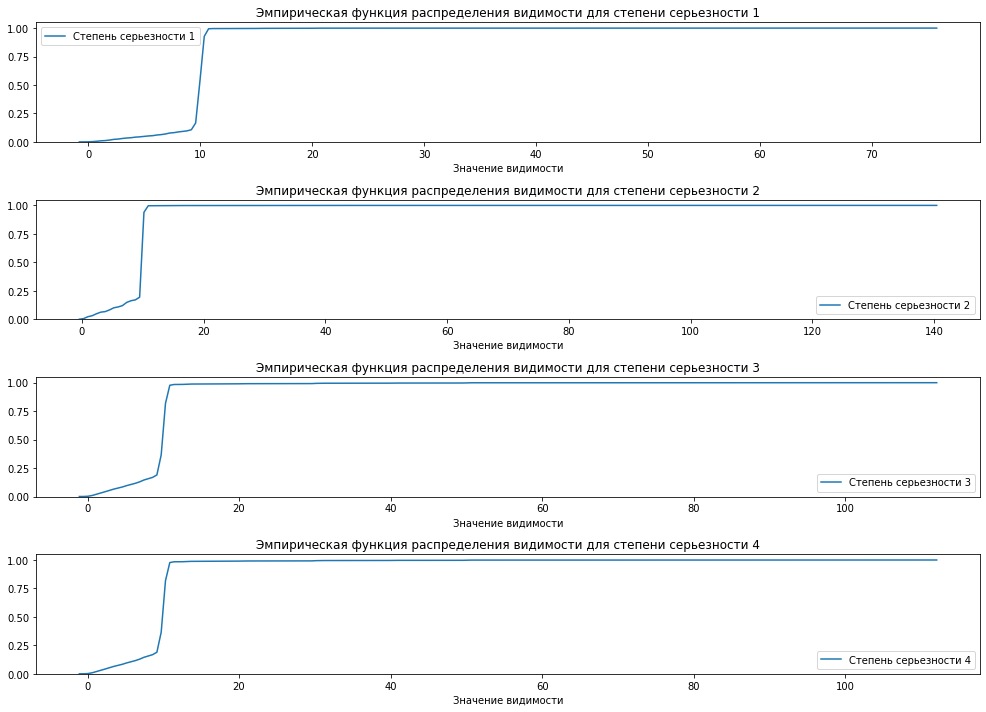

In [25]:
fig, axes = plt.subplots(4, figsize = (14,10))

sns.kdeplot(df1["Visibility(mi)"],  cumulative=True, label = "Степень серьезности 1",
           ax = axes[0])
axes[0].legend()
axes[0].set_title("Эмпирическая функция распределения видимости для степени серьезности 1")

sns.kdeplot(df2["Visibility(mi)"],  cumulative=True, label = "Степень серьезности 2",
           ax = axes[1])
axes[1].legend()
axes[1].set_title("Эмпирическая функция распределения видимости для степени серьезности 2")

sns.kdeplot(df3["Visibility(mi)"],  cumulative=True, label = "Степень серьезности 3",
           ax = axes[2])
axes[2].legend()
axes[2].set_title("Эмпирическая функция распределения видимости для степени серьезности 3")

sns.kdeplot(df3["Visibility(mi)"],  cumulative=True, label = "Степень серьезности 4",
           ax = axes[3])
axes[3].legend()
axes[3].set_title("Эмпирическая функция распределения видимости для степени серьезности 4")

fig.tight_layout()
for i in range(4):
    axes[i].set_xlabel("Значение видимости")
    axes[i].set_ylabel("")
    
plt.show()

### 3. Построить вариационный ряд и статистический ряд для величины  – температура воздуха в момент совершения аварии (Temperature), построить группированный статистический ряд.

In [26]:
df_temperature = data1['Temperature(F)'].dropna()

Вариационный ряд - неубывающая последовательность выборочных значений

In [27]:
variation_series = df_temperature.sort_values(axis = 0)
variation_series

2235802    -89.0
2235797    -89.0
1998209    -58.0
2008428    -50.0
2648939    -40.0
           ...  
2626381    168.8
2509205    170.6
1108162    196.0
496322     196.0
867812     196.0
Name: Temperature(F), Length: 2763712, dtype: float64

Статистический ряд - таблица из двух рядов. Первый ряд - значения выборки в порядке возрастания, второй - количество значений.

In [28]:
tmp = df_temperature.value_counts()
tmp

 73.0     64261
 77.0     63218
 75.0     60285
 72.0     59484
 68.0     58337
          ...  
-25.6         1
-23.3         1
 109.8        1
-9.8          1
 99.1         1
Name: Temperature(F), Length: 787, dtype: int64

In [29]:
stat_series = tmp.sort_index(axis = 0)
stat_series

-89.0     2
-58.0     1
-50.0     1
-40.0     1
-33.0     1
         ..
 144.0    1
 156.0    1
 168.8    1
 170.6    1
 196.0    3
Name: Temperature(F), Length: 787, dtype: int64

Групированный статистический ряд

Text(0.5, 0, 'Count of values')

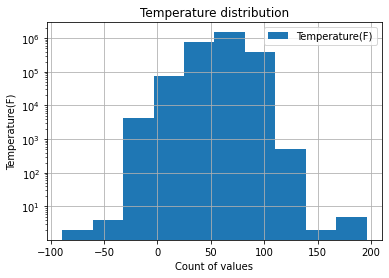

In [30]:
df_temperature.hist(log = True, legend = True)
plt.title("Temperature distribution")
plt.ylabel("Temperature(F)")
plt.xlabel("Count of values")

### 4. Определить 5 городов с наибольшим количеством автомобильных аварий за наблюдаемый период. Построить функции распределения случайных величин Di - протяженность участка дороги, задействованного при аварии (Distance), в i-ом городе из данного списка, i = 1, 2, …, 5

In [31]:
frequent_cities = data1['City'].value_counts()[:5]

In [32]:
frequent_cities

Miami          106153
Los Angeles     68630
Orlando         54475
Dallas          41869
Houston         39192
Name: City, dtype: int64

In [33]:
city_indexes = frequent_cities.index

In [34]:
data1[data1['City'] == str(city_indexes[0])].head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
29519,A-29520,4,2016-07-07 11:46:47,2016-07-07 17:46:47,36.86210,-94.85134,36.99587,-94.61805,15.857,Closed between OK-10/Exit 313 and Oklahoma/Mis...,...,False,False,False,False,False,False,Day,Day,Day,Day
31596,A-31597,2,2016-11-30 16:35:52,2016-11-30 22:35:52,25.78601,-80.25809,25.78336,-80.26911,0.710,At SR-953/42nd Ave/Le Jeune Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
31660,A-31661,2,2016-11-30 18:35:52,2016-12-01 00:35:52,25.66214,-80.38860,25.65292,-80.38712,0.644,At 120th St/Exit 19 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
31734,A-31735,2,2016-12-01 05:51:51,2016-12-01 11:51:51,25.97053,-80.16576,25.95995,-80.16870,0.753,At Ives Dairy Rd/203rd St/Exit 16 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
31735,A-31736,3,2016-12-01 06:03:23,2016-12-01 12:03:23,25.78447,-80.29346,25.78488,-80.28444,0.562,At SR-959/Red Rd - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


In [35]:
dfcity=[]
for i in range(5):
    dfcity.append(data1[data1['City'] == str(city_indexes[i])]['Distance(mi)'])

In [36]:
dfcity[0]

29519      15.857
31596       0.710
31660       0.644
31734       0.753
31735       0.562
            ...  
2844577     0.028
2844578     0.205
2844996     0.000
2845009     0.382
2845025     0.394
Name: Distance(mi), Length: 106153, dtype: float64

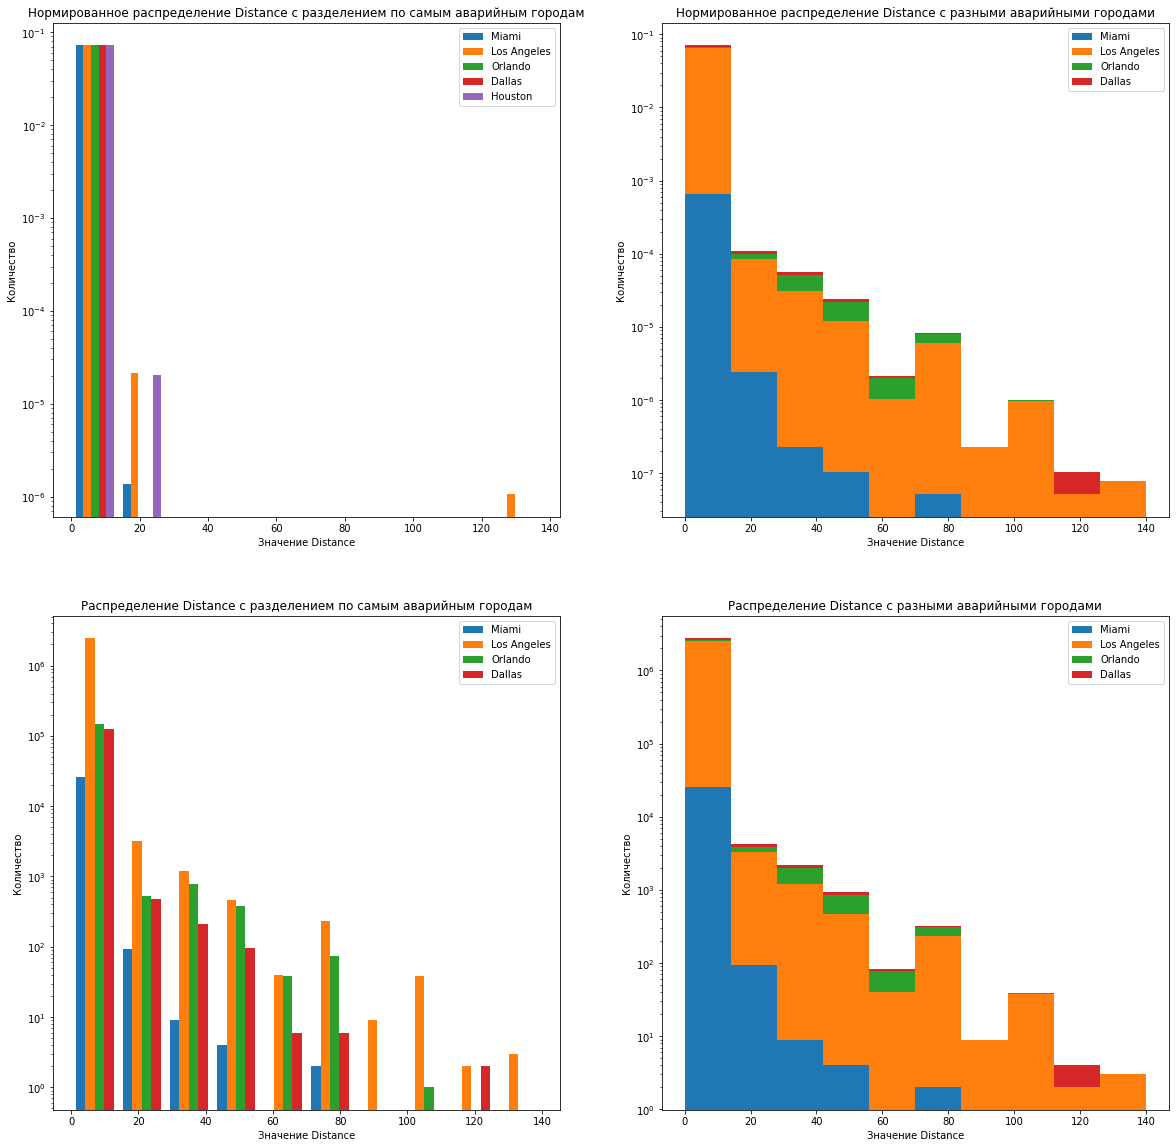

In [37]:
fig, axes = plt.subplots(ncols=2,nrows=2, figsize = (20, 20))


axes[0][0].hist(dfcity, log = True, label = city_indexes, histtype = 'bar', density = True)
axes[0][0].legend()
axes[0][0].set_title("Нормированное распределение Distance с разделением по самым аварийным городам")

axes[1][0].hist(df_separeted, log = True, label = city_indexes, histtype = 'bar')
axes[1][0].legend()
axes[1][0].set_title("Распределение Distance с разделением по самым аварийным городам")

axes[0][1].hist(df_separeted, log = True, label = city_indexes, histtype = 'bar', density = True, stacked = True)
axes[0][1].legend()
axes[0][1].set_title("Нормированное распределение Distance с разными аварийными городами")

axes[1][1].hist(df_separeted, log = True, label = city_indexes, histtype = 'bar', stacked = True)
axes[1][1].legend()
axes[1][1].set_title("Распределение Distance с разными аварийными городами")

for i in range(2):
    for j in range(2):
        axes[i][j].set_xlabel("Значение Distance")
        axes[i][j].set_ylabel("Количество")

plt.show()

C:\Users\OgRob\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\OgRob\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\OgRob\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

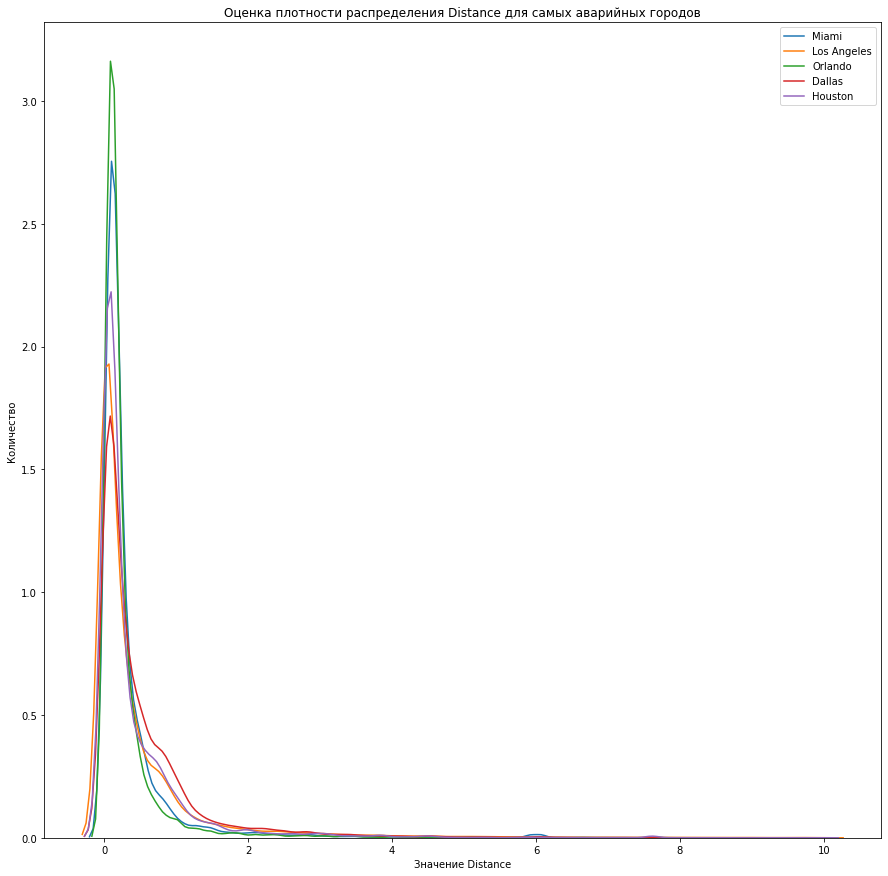

In [38]:
fig, axes = plt.subplots(1, figsize = (15, 15))

for i in range(5):
    sns.distplot(dfcity[i][dfcity[i] <=10], kde = True, label = city_indexes[i], hist = False)

plt.title("Оценка плотности распределения Distance для самых аварийных городов")
plt.xlabel("Значение Distance")
plt.ylabel("Количество")
plt.legend()
plt.show()

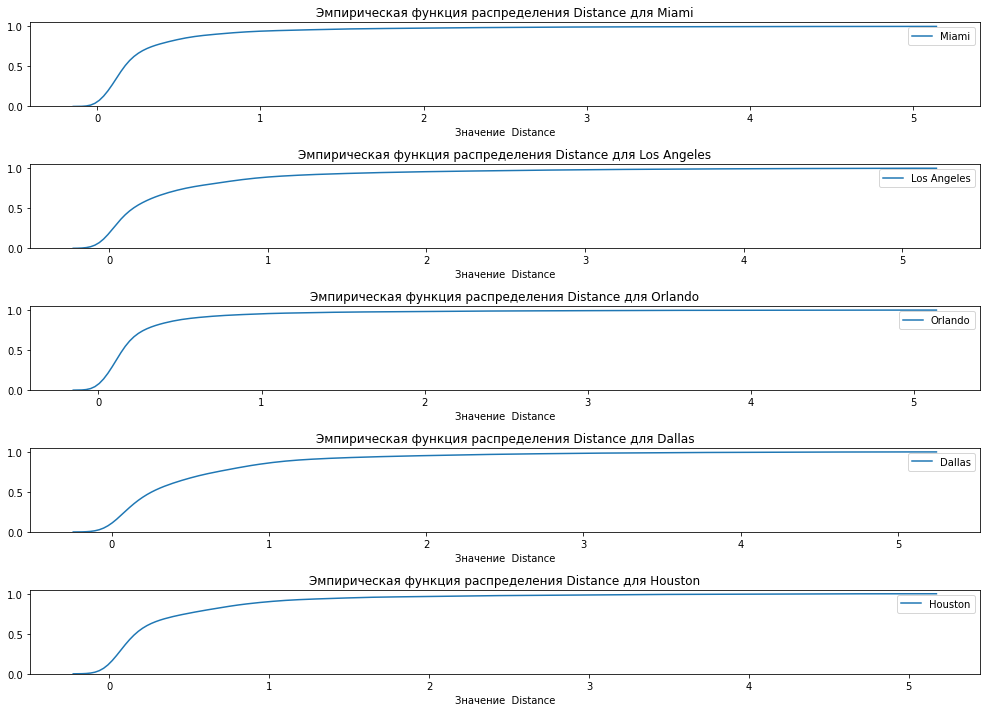

In [39]:
fig, axes = plt.subplots(5, figsize = (14,10))

for i in range(5):
    sns.kdeplot(dfcity[i][dfcity[i] <=5],  cumulative=True, label = city_indexes[i],
               ax = axes[i])
    axes[i].legend()
    axes[i].set_title("Эмпирическая функция распределения Distance для " +  city_indexes[i])


fig.tight_layout()
for i in range(5):
    axes[i].set_xlabel("Значение  Distance")
    axes[i].set_ylabel("")
    
plt.show()